In [11]:
import math
import numpy as np
import os
import csv
import tensorflow as tf
# from tensorflow import keras.models
from keras.models import Sequential
from keras.layers import Dense

In [13]:
arquivos_csv= os.listdir('./Dados_CSVs_2703')
print(arquivos_csv)
# index_arquivos=len(arquivos_csv)

# print(index_arquivos)

['OxygenSensorDTC.csv', 'DadosNominais_COMPLETOS.csv', 'KnockSensorDTC.csv', 'FuelTrimDTC.csv', 'CatalystConverterDTC.csv', 'EGRDTC.csv', 'CoolantThermostatDTC.csv']


In [1]:
# with open('teste.txt','w+') as file:
#     for i in range(10):
#         file.write(str(i))
# a = [i for i in range(10)]


In [5]:
contador=0 # contador para garantir que eu crio matrix3 igual a matrix somente uma vez no codigo 
# matrix3 = np.empty(shape=(0,0),dtype='object') 

# CRIAR UMA MATRIX DE SAIDA
# output = numero de colunas dela vai ser o numero de eventos que eu tenho, 



for a in arquivos_csv:
    obj= "./Dados_CSVs_2703/" + a
    aux=[] #ressetando minha lista que sera utilizada para armazenar os valores
    with open(obj, newline='') as file:
        reader = csv.reader(file)
        res = list(map(tuple, reader))
        for j2 in range(len(res)):
            aux.append(res[j2]) # colocando os valores dentro da lista vazia
            
    aux1=np.array(aux) # transformando minha lista em um array
    aji=len(aux1) #numero de linhas
    bji=len(aux1[0]) #numero de colunas
    matrix = np.empty(shape=(aji-1,bji),dtype='object')  # essa é a matriz que é alocada dinamicamente a cada interação da lista de CSVs
    h=(aji-1, index_arquivos)
    matrix2=np.zeros(h) # criando/reiniciando a matrix dinamica vazia de zeros base para a saida
    
#     print(len(matrix))
#     print(len(matrix2))

    for i in range(aji):
        
        if i == 0:
            print("\n cabeçalho: "+a) #pulando o cabeçalho para que a mtriz contenha apenas os valores reais
        else:
            vet=aux1[i]
#             print("entrou no loop") # verificação
            for j in range(bji):
               
                if vet[j] == 'False': # fazendo o ajuste dos valores booleanos
                    c=0
                elif vet[j] == 'True':
                    c=1
                else:
                    c = vet[j] # para alocar o 
                matrix2[i-1][arquivos_csv.index(a)]= 1 # matrix dinamica de saida
                matrix[i-1][j]= float(c) # normalizando os valores todos para float, garantindo que minha matriz só tem valores
    if contador: # checando o contador, se for é necessario criar a matriz, com as dimensões especidificadas
        contador +=1
#         print("não foi aqui")
        saida=np.concatenate((saida, matrix2))
        entrada=np.concatenate((entrada, matrix)) # concatenate coloca cada matriz uma em cima da outra
    else:
        contador +=1 # contador para garantir que eu somente aloco esses valores na primeira vez
#         print("foi aqui") 
        saida=matrix2
        entrada=matrix

print("\nQuantas vezes foi iterado meu sistema: ",contador)
index_csv=len(entrada[0])
print('Comprimento vetor de entrada: ',index_csv)




 cabeçalho: OxygenSensorDTC.csv

 cabeçalho: DadosNominais_COMPLETOS.csv

 cabeçalho: KnockSensorDTC.csv

 cabeçalho: FuelTrimDTC.csv

 cabeçalho: CatalystConverterDTC.csv

 cabeçalho: EGRDTC.csv

 cabeçalho: CoolantThermostatDTC.csv

Quantas vezes foi iterado meu sistema:  7
Comprimento vetor de entrada:  18


In [18]:
# criar um algoritmo para randomizar os dados, pois 
a=np.array(entrada) #(5,18)
b=np.array(saida) #(5,7)
print('matriz a:\n',a)
print('matriz b:\n',b)

c = np.c_[a.reshape(len(a), -1), b.reshape(len(b), -1)]
print('matriz c: \n', c)
np.random.shuffle(c)
print('matriz c randomizada: \n', c)
entrada3= c[:, :a.size//len(a)].reshape(a.shape)
saida3= c[:, a.size//len(a):].reshape(b.shape)
print('matriz a2:\n',entrada3)
print('matriz b2:\n',saida3)


matriz a:
 [[0.74 0.68 0.0 ... 2.4000000000000004 0.0 0.0]
 [0.015 0.66 0.66 ... 3.2 0.0 0.0]
 [0.0 0.67 0.0 ... 1.6 0.0 0.0]
 ...
 [0.66 0.66 0.0 ... 3.2 0.0 0.0]
 [0.0 0.67 0.66 ... 2.4000000000000004 0.0 0.0]
 [0.21 0.68 0.0 ... 1.6 0.0 0.0]]
matriz b:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
matriz c: 
 [[0.74 0.68 0.0 ... 0.0 0.0 0.0]
 [0.015 0.66 0.66 ... 0.0 0.0 0.0]
 [0.0 0.67 0.0 ... 0.0 0.0 0.0]
 ...
 [0.66 0.66 0.0 ... 1.0 0.0 0.0]
 [0.0 0.67 0.66 ... 0.0 0.0 0.0]
 [0.21 0.68 0.0 ... 0.0 0.0 0.0]]
matriz c randomizada: 
 [[0.35 0.66 0.35 ... 0.0 0.0 0.0]
 [0.035 0.68 0.74 ... 0.0 0.0 0.0]
 [0.35 0.64 0.74 ... 0.0 1.0 0.0]
 ...
 [0.74 0.64 0.74 ... 0.0 0.0 0.0]
 [0.66 0.64 0.35 ... 0.0 0.0 0.0]
 [0.0 0.64 0.66 ... 0.0 0.0 0.0]]
matriz a2:
 [[0.35 0.66 0.35 ... 1.6 0.0 0.0]
 [0.035 0.68 0.74 ... 4.800000000000001 0.0 0.0]
 [0.35 0.64 0.74 ... 4.0 0.0 0.0]
 ...
 [

In [21]:
entrada_alt=np.matrix(entrada3).astype(float) 
entrada1= tf.keras.utils.normalize(entrada_alt, axis =1) #criando o array normalizado, no qual os valores não são maiores que 1


saida=np.array(saida3).astype(float) #(5,7)
# print("dimensões entrada:", entrada2.shape)
print("dimensões saida:", saida.shape)
neuronios=13 #(18+7)/2 =12.5
camadas=2 #duas pois o trabalho não é muuuito complexo


classificador = Sequential()
classificador.add(Dense(units=13, activation= 'relu', input_dim=index_csv)) #primeira camada oculta com 18 entradas
classificador.add(Dense(units=13, activation= 'relu')) #segunda camada oculta
# classificador.add(Dense(units=13, activation= 'relu')) # terceira camada oculta
classificador.add(Dense(units= index_arquivos, activation= 'sigmoid')) #saida com tamanho da saida(7 elementos)
classificador.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])


epocas= 20

dimensões saida: (9385, 7)


In [22]:

print("\n resultados e treino com entradas normalizadas:\n")
hist=classificador.fit(entrada1,
                       saida,
                       validation_split=0.25,
                       verbose=1,                        
                       batch_size=10,
                       shuffle=True,
                       epochs=epocas)


 resultados e treino com entradas normalizadas:

Epoch 1/20
704/704 [==============================] - 2s 3ms/step - loss: 0.4330 - accuracy: 0.3002 - val_loss: 0.3889 - val_accuracy: 0.3366
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3911 - accuracy: 0.3289 - val_loss: 0.3889 - val_accuracy: 0.3366
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3909 - accuracy: 0.3289 - val_loss: 0.3896 - val_accuracy: 0.3366
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3909 - accuracy: 0.3289 - val_loss: 0.3887 - val_accuracy: 0.3366
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3908 - accuracy: 0.3289 - val_loss: 0.3890 - val_accuracy: 0.3366
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3907 - accuracy: 0.3289 - val_loss: 0.3888 - val_accuracy: 0.3366
Epoch 7/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3907 - accuracy: 0.328

In [20]:
print("\n resultados e treino com entradas normalizadas e randomizadas: \n")

entrada3=np.matrix(entrada3).astype(float) 
# entrada=entrada.astype(float)
entrada3= tf.keras.utils.normalize(entrada3, axis =1)
hist=classificador.fit(entrada3,
                       saida3.astype(float),
                       validation_split=0.25,
                       verbose=1,
                       batch_size=10,
                       epochs=epocas+10)


 resultados e treino com entradas normalizadas e randomizadas: 

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4278 - accuracy: 0.2944 - val_loss: 0.3891 - val_accuracy: 0.3366
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3910 - accuracy: 0.3289 - val_loss: 0.3889 - val_accuracy: 0.3366
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3909 - accuracy: 0.3289 - val_loss: 0.3888 - val_accuracy: 0.3366
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3908 - accuracy: 0.3289 - val_loss: 0.3892 - val_accuracy: 0.3366
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3907 - accuracy: 0.3289 - val_loss: 0.3890 - val_accuracy: 0.3366
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3907 - accuracy: 0.3289 - val_loss: 0.3893 - val_accuracy: 0.3366
Epoch 7/30
704/704 [==============================] - 3s 4ms/step - loss: 0.3905 -

{'loss': [0.43411707878112793, 0.39078688621520996, 0.3906906545162201, 0.3906016945838928, 0.3905477523803711, 0.3905405104160309, 0.3904794752597809, 0.3903976380825043, 0.39040496945381165, 0.3904574513435364, 0.3902946710586548, 0.3902532458305359, 0.39033228158950806, 0.3902893364429474, 0.39025115966796875, 0.3902380168437958, 0.3902329206466675, 0.3902572989463806, 0.39019909501075745, 0.3901990056037903, 0.3901841938495636, 0.3901011645793915, 0.3901287019252777, 0.3901272714138031, 0.39009395241737366, 0.3900264799594879, 0.39007118344306946, 0.3899901509284973, 0.3900351822376251, 0.3899202048778534], 'accuracy': [0.2647058963775635, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.32963910698890686, 0.3296391069

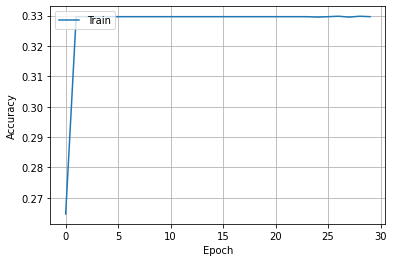

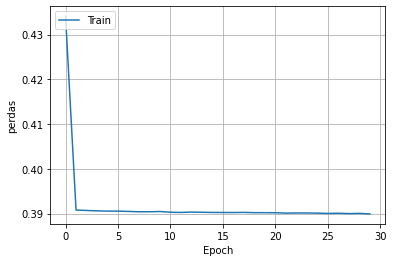

In [14]:
# https://keras.io/visualization/ 
#  visualização com keras, acessando o conteudo do historico
import matplotlib.pyplot as plt

print(hist.history, '\n conteudo do dictionary')
preci=hist.history['accuracy']
print(preci)
perdas=hist.history['loss']
print(perdas)
b=[i for i in range(len(preci))]
plt.plot(b, preci), plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(b, perdas), plt.grid(True)
plt.ylabel('perdas')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# val_ac=hist.history['val_acc']

# print(preci)
# plt.plot(hist.history['acc'])

# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
# print(aux.content())
# historia=classificador.history['acc']
# print(historia)